<a href="https://colab.research.google.com/github/YuvanBharathi13/DeepLearning/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-06-01 18:03:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.207, 172.217.70.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.3MB/s    in 5.9s    

2025-06-01 18:04:00 (17.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [6]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [7]:
# Another way of counting the number of images in folder
# it lists all the names in a directory
num_img_train_pizza = len(os.listdir("pizza_steak/train/pizza"))
print(num_img_train_pizza)

750


# Get the class names programmatically,

In [8]:
import pathlib
data_dir = pathlib.Path('pizza_steak/train')
# converts that string into a Path object, which is more powerful and flexible for file and directory operations
class_names = np.array(sorted(item.name for item in data_dir.glob('*'))) # '*' lists all files
print(class_names)

['pizza' 'steak']


# View images randomly

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1) # picks a random image path from all the filnames

  img = mpimg.imread(target_folder + "/" + random_image[0])

  print(f'image shape = {img.shape}')
  return img


image shape = (289, 512, 3)


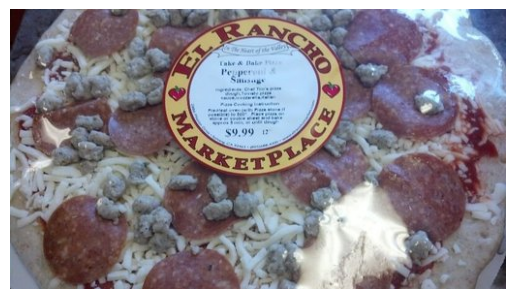

In [10]:
img = view_random_image('pizza_steak/train/','pizza')
plt.imshow(img)
plt.axis("off"); # It prevents the object info (like <AxesSubplot:>) from being printed in the output cell.

array([[[ 25,   6,   2],
        [ 27,   8,   4],
        [ 32,   8,   6],
        ...,
        [ 46,  58,  98],
        [ 49,  58,  99],
        [ 48,  57,  98]],

       [[ 25,   6,   2],
        [ 28,   7,   4],
        [ 33,   9,   7],
        ...,
        [ 50,  62, 102],
        [ 50,  59, 100],
        [ 47,  56,  97]],

       [[ 26,   7,   3],
        [ 29,   8,   5],
        [ 33,   9,   7],
        ...,
        [ 50,  62, 102],
        [ 48,  57,  98],
        [ 44,  53,  94]],

       ...,

       [[123, 132, 149],
        [126, 135, 152],
        [129, 138, 155],
        ...,
        [ 64,  58,  68],
        [ 66,  58,  69],
        [ 67,  59,  70]],

       [[119, 126, 142],
        [122, 131, 146],
        [127, 136, 153],
        ...,
        [ 66,  63,  74],
        [ 66,  60,  72],
        [ 65,  59,  71]],

       [[ 79,  86,  96],
        [121, 129, 140],
        [130, 137, 153],
        ...,
        [ 71,  69,  82],
        [ 73,  69,  83],
        [ 67,  63,  77]]], dtype=uint8)
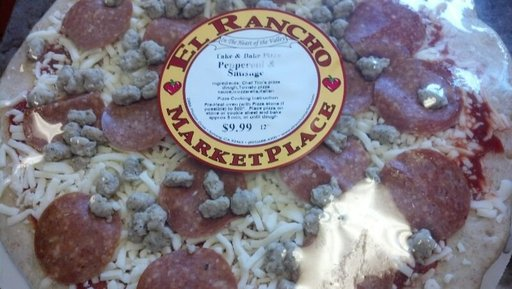

In [11]:
img

# Pre-processing

## normalizing an image

In [12]:
img/255

array([[[0.09803922, 0.02352941, 0.00784314],
        [0.10588235, 0.03137255, 0.01568627],
        [0.1254902 , 0.03137255, 0.02352941],
        ...,
        [0.18039216, 0.22745098, 0.38431373],
        [0.19215686, 0.22745098, 0.38823529],
        [0.18823529, 0.22352941, 0.38431373]],

       [[0.09803922, 0.02352941, 0.00784314],
        [0.10980392, 0.02745098, 0.01568627],
        [0.12941176, 0.03529412, 0.02745098],
        ...,
        [0.19607843, 0.24313725, 0.4       ],
        [0.19607843, 0.23137255, 0.39215686],
        [0.18431373, 0.21960784, 0.38039216]],

       [[0.10196078, 0.02745098, 0.01176471],
        [0.11372549, 0.03137255, 0.01960784],
        [0.12941176, 0.03529412, 0.02745098],
        ...,
        [0.19607843, 0.24313725, 0.4       ],
        [0.18823529, 0.22352941, 0.38431373],
        [0.17254902, 0.20784314, 0.36862745]],

       ...,

       [[0.48235294, 0.51764706, 0.58431373],
        [0.49411765, 0.52941176, 0.59607843],
        [0.50588235, 0

# End to End CNN

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocess the data (get all the values between 0 & 1)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# set up paths to our data directory
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# import the data from the directory and load them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)
# building the model (tiny VGG)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),

    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data= test_data,
                        validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 214ms/step - accuracy: 0.5838 - loss: 0.6477 - val_accuracy: 0.8600 - val_loss: 0.3793
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.8154 - loss: 0.4379 - val_accuracy: 0.8440 - val_loss: 0.3549
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.8324 - loss: 0.3770 - val_accuracy: 0.8760 - val_loss: 0.3149
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.8539 - loss: 0.3528 - val_accuracy: 0.7840 - val_loss: 0.4388
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - accuracy: 0.8523 - loss: 0.3464 - val_accuracy: 0.8660 - val_loss: 0.3134


Text(0.5, 1.0, 'Loss after epoch')

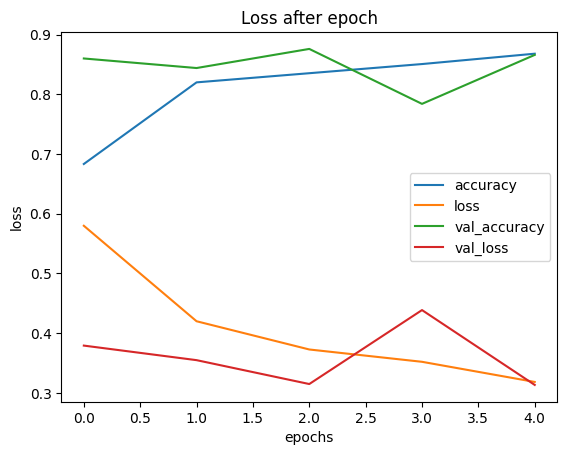

In [14]:
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Loss after epoch")

In [15]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

# classification NN on picture dataset

## model 2

In [16]:
# set random seed
tf.random.set_seed(42)

# build the model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

#compiling the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# fit the model
history_2 = model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
            validation_data=test_data,validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - accuracy: 0.4800 - loss: 0.6967 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.4846 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.4917 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.5234 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.4974 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


Text(0.5, 1.0, 'Loss after epoch')

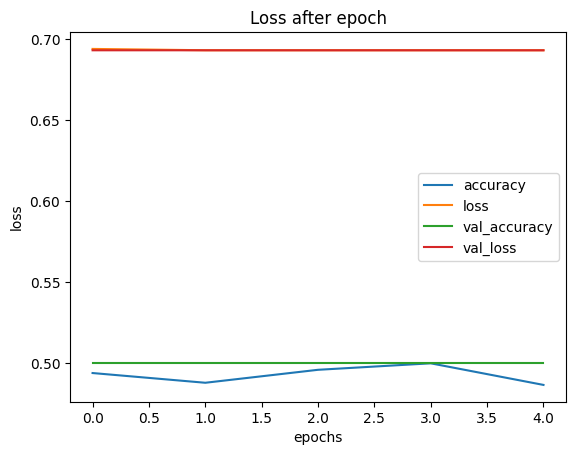

In [17]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Loss after epoch")

## model 3

In [18]:
# set random seed
tf.random.set_seed(42)

# build the model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
history_3 = model_3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                        validation_data=test_data,validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.5906 - loss: 9.9710 - val_accuracy: 0.7700 - val_loss: 1.0343
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.7357 - loss: 0.8769 - val_accuracy: 0.7720 - val_loss: 0.4571
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.7361 - loss: 0.8391 - val_accuracy: 0.7180 - val_loss: 1.4073
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.7421 - loss: 0.9935 - val_accuracy: 0.7340 - val_loss: 0.6099
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.7823 - loss: 0.5648 - val_accuracy: 0.7420 - val_loss: 0.5622


In [19]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     9,633,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,914,245 (110.30 MB)

 Trainable params: 9,638,081 (36.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,276,164 (73.53 MB)

# knowing your data

image shape = (384, 512, 3)


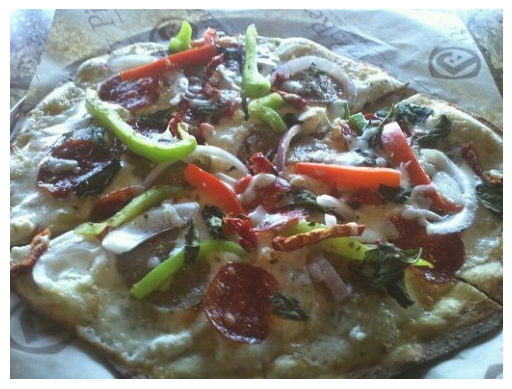

In [20]:
img = view_random_image('pizza_steak/train/','pizza')
plt.imshow(img)
plt.axis("off");

In [21]:
img.shape

(384, 512, 3)

image shape = (384, 512, 3)


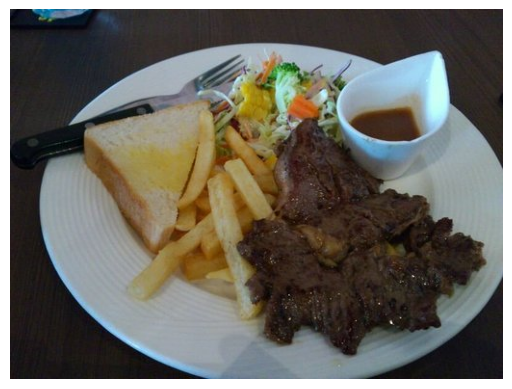

In [22]:
img_2 = view_random_image('pizza_steak/train/','steak')
plt.imshow(img_2)
plt.axis('off');

# Preprocess data

In [3]:
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [5]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size = (224,224),
                                                class_mode = 'binary',
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size = (224,224),
                                                class_mode = 'binary',
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
len(train_data)

47

In [27]:
images, labels = train_data[0]
len(images), len(labels)

(32, 32)

In [28]:
images[0].shape, labels[0]

((224, 224, 3), np.float32(0.0))

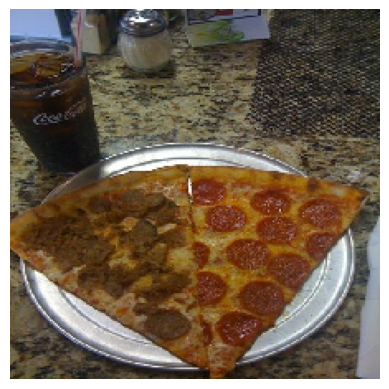

In [29]:
plt.imshow(images[0])
plt.axis('off');

# Baseline Model

In [6]:
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding='valid',
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [8]:
history_4 = model_4.fit(train_data,epochs=5,steps_per_epoch=len(train_data,),
                        validation_data=test_data,validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 270ms/step - accuracy: 0.6205 - loss: 3.2614 - val_accuracy: 0.7960 - val_loss: 0.4683
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.8069 - loss: 0.4401 - val_accuracy: 0.8180 - val_loss: 0.4285
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.8433 - loss: 0.3829 - val_accuracy: 0.8160 - val_loss: 0.4232
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.9385 - loss: 0.2302 - val_accuracy: 0.7980 - val_loss: 0.4692
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.9850 - loss: 0.0873 - val_accuracy: 0.7320 - val_loss: 0.9042


In [9]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.7255 - loss: 0.8889


[0.9042201042175293, 0.7319999933242798]

## Evaluating baseline model

In [11]:
import matplotlib.pyplot as plt

In [15]:
model_4_df = pd.DataFrame(history_4.history)
model_4_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.674000,1.646935,0.796,0.468333
1,0.801333,0.454949,0.818,0.428470
2,0.850667,0.372224,0.816,0.423219
3,0.929333,0.216772,0.798,0.469154
4,0.984000,0.075802,0.732,0.904220


In [22]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

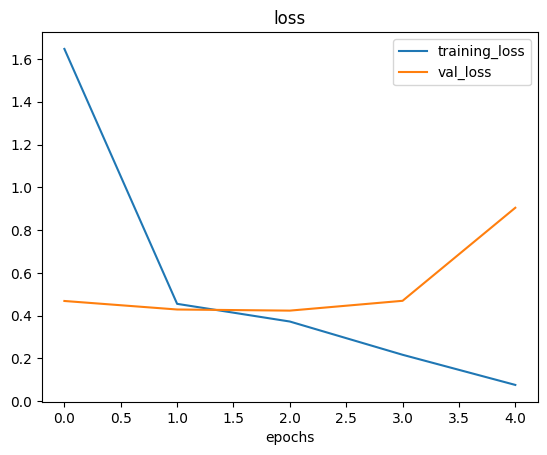

In [23]:
plot_loss_curves(history_4)

In [24]:
def plot_accuracy_curves(history):
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(accuracy))

  plt.plot(epochs,accuracy,label='accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

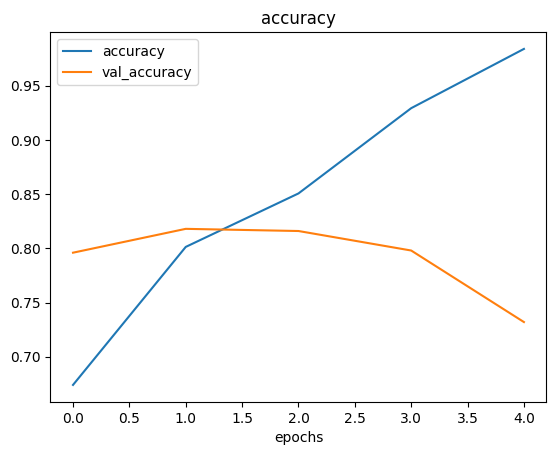

In [25]:
plot_accuracy_curves(history_4)

* What to do when the training loss is getting better but the validation loss on average remains the same or even gets worse.

* when you start seeing the validdation loss getting worse it probably means the model is overfitting the training data.

* So from the graphs we can say that our baseline model with just the Conv2D layers is over fitting the trainign data, let see if adding the maxpool layer could prevent over fitting

* Ways to reduce overfitting -
          1. add data augmentation
          2. add regularization layers (MaxPool layers)
          3. add more data .....

# Model 5

In [28]:
# create the model
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# fit the model
history_5 = model_5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                        validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.5883 - loss: 0.6685 - val_accuracy: 0.7880 - val_loss: 0.4923
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.7860 - loss: 0.4977 - val_accuracy: 0.8380 - val_loss: 0.3848
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.8142 - loss: 0.4236 - val_accuracy: 0.8640 - val_loss: 0.3418
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.8167 - loss: 0.4116 - val_accuracy: 0.8580 - val_loss: 0.3503
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.8549 - loss: 0.3610 - val_accuracy: 0.8960 - val_loss: 0.3085


**If the convolutional layer finds the features of an image the max pool layer finds the most important parts of the features**

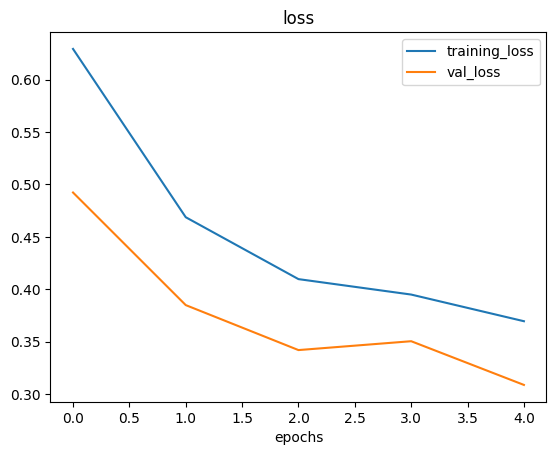

In [29]:
plot_loss_curves(history_5)

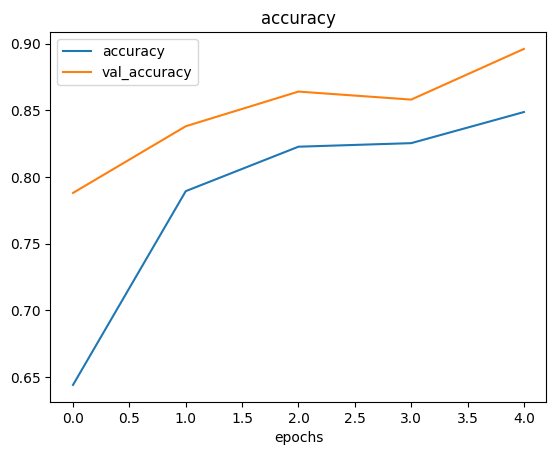

In [30]:
plot_accuracy_curves(history_5)

**Another way to see if the model is overfitting or underfitting is if the training_loss curve and the validadtion loss curve have different shapes. When they have a similar shape that means there is no overfitting or underfitting**

**Reducing overfitting is also called as regularization**

In [31]:
model_4.evaluate(test_data), model_5.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.7144 - loss: 0.9637
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.8943 - loss: 0.3141


([0.9042201042175293, 0.7319999933242798],
 [0.3085468113422394, 0.8960000276565552])

# Data Augmentation